In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df=pd.read_csv("customer_support_tickets_corrected.csv")
df

,Ticket ID,Ticket Description,Category
0,T001,I need support with the app installation on my...,General Inquiry
1,T002,How do I switch my plan from basic to premium?,General Inquiry
2,T003,How do I update my account settings?,Account Issue
3,T004,Can I get an invoice for my recent purchase?,Billing Issue
4,T005,How can I upgrade my current subscription?,Product Inquiry
...,...,...,...
495,T496,Why is my payment method being declined?,Billing Issue
496,T497,I forgot my password and can't log in.,Account Issue
497,T498,My notifications are not being delivered prope...,Technical Issue
498,T499,Do you provide international shipping?,General Inquiry


In [4]:
df["Category"].unique()

array(['General Inquiry', 'Account Issue', 'Billing Issue',
       'Product Inquiry', 'Technical Issue'], dtype=object)

In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [6]:
df["Preprocessed TD"]=df["Ticket Description"].apply(preprocess_text)
df

,Ticket ID,Ticket Description,Category,Preprocessed TD
0,T001,I need support with the app installation on my...,General Inquiry,need support app installation device
1,T002,How do I switch my plan from basic to premium?,General Inquiry,switch plan basic premium
2,T003,How do I update my account settings?,Account Issue,update account setting
3,T004,Can I get an invoice for my recent purchase?,Billing Issue,get invoice recent purchase
4,T005,How can I upgrade my current subscription?,Product Inquiry,upgrade current subscription
...,...,...,...,...
495,T496,Why is my payment method being declined?,Billing Issue,payment method declined
496,T497,I forgot my password and can't log in.,Account Issue,forgot password cant log
497,T498,My notifications are not being delivered prope...,Technical Issue,notification delivered properly
498,T499,Do you provide international shipping?,General Inquiry,provide international shipping


In [7]:
lbl=LabelEncoder()
df["Category"]=lbl.fit_transform(df["Category"])
df

,Ticket ID,Ticket Description,Category,Preprocessed TD
0,T001,I need support with the app installation on my...,2,need support app installation device
1,T002,How do I switch my plan from basic to premium?,2,switch plan basic premium
2,T003,How do I update my account settings?,0,update account setting
3,T004,Can I get an invoice for my recent purchase?,1,get invoice recent purchase
4,T005,How can I upgrade my current subscription?,3,upgrade current subscription
...,...,...,...,...
495,T496,Why is my payment method being declined?,1,payment method declined
496,T497,I forgot my password and can't log in.,0,forgot password cant log
497,T498,My notifications are not being delivered prope...,4,notification delivered properly
498,T499,Do you provide international shipping?,2,provide international shipping


In [8]:
tfidf=TfidfVectorizer(max_features=5000)

In [9]:
x=tfidf.fit_transform(df["Preprocessed TD"]).toarray()
y=df["Category"]
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.46931363, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
X_tfidf_df = pd.DataFrame(x, columns=tfidf.get_feature_names_out())
X_tfidf_df

,accessing,account,added,address,another,app,arrived,assist,attempt,available,...,user,using,verify,want,warranty,website,work,working,wrong,yet
0,0.0,0.000000,0.0,0.000000,0.0,0.394106,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.469314,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print(f"Processed data shape: {x.shape}")
print(f"Number of unique categories: {len(lbl.classes_)}")

Processed data shape: (500, 141)
Number of unique categories: 5


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
mnb=MultinomialNB()
mnb

MultinomialNB()

In [14]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [15]:
mapping_mnb = {0: 'Account Issue', 1: 'Billing Issue', 2: 'General Inquiry',3:'Product Inquiry',4:'Technical Issue'}
prediction_mnb=mnb.predict(x_test)
pred_mnb=[mapping_mnb[value] for value in prediction_mnb]

In [16]:
prediction_mnb = pd.DataFrame(prediction_mnb, columns=["Predicted - Numerical"])
categorical_mnb=pd.DataFrame(pred_mnb,columns=["Predicted - Categorical"])

In [17]:
predict_df=pd.concat([prediction_mnb,categorical_mnb],axis=1)
predict_df

,Predicted - Numerical,Predicted - Categorical
0,4,Technical Issue
1,2,General Inquiry
2,2,General Inquiry
3,1,Billing Issue
4,0,Account Issue
...,...,...
95,3,Product Inquiry
96,2,General Inquiry
97,2,General Inquiry
98,4,Technical Issue


In [18]:
#manual - multinomial Naive Bayes
def predict_category_m(text):
    text = preprocess_text(text)  # Apply same preprocessing
    text_tfidf = tfidf.transform([text]).toarray()  # Convert to TF-IDF vector
    prediction = mnb.predict(text_tfidf)  # Predict
    return mapping_mnb[prediction[0]]  # Convert back to label

mnb_input=input("Comment: ")
m_pred = predict_category_m(mnb_input)
print(f"Category: {m_pred}") 


Comment:  I haven't received my refund yet.


Category: Billing Issue


In [19]:
cm_mnb=confusion_matrix(y_test,prediction_mnb)
cr_mnb=classification_report(y_test,prediction_mnb,target_names=lbl.classes_)
print(cm_mnb)
print("-"*50)
print(cr_mnb)

[[20  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 14]]
--------------------------------------------------
                 precision    recall  f1-score   support

  Account Issue       1.00      1.00      1.00        20
  Billing Issue       1.00      1.00      1.00        21
General Inquiry       1.00      1.00      1.00        32
Product Inquiry       1.00      1.00      1.00        13
Technical Issue       1.00      1.00      1.00        14

       accuracy                           1.00       100
      macro avg       1.00      1.00      1.00       100
   weighted avg       1.00      1.00      1.00       100



In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
mapping_rf = {0: 'Account Issue', 1: 'Billing Issue', 2: 'General Inquiry',3:'Product Inquiry',4:'Technical Issue'}
prediction_rf=model.predict(x_test)
pred_rf=[mapping_rf[value] for value in prediction_rf]



In [22]:
prediction_rf = pd.DataFrame(prediction_rf, columns=["Predicted - Numerical"])
categorical_rf=pd.DataFrame(pred_rf,columns=["Predicted - Categorical"])
predict_rf=pd.concat([prediction_rf,categorical_rf],axis=1)
predict_rf

,Predicted - Numerical,Predicted - Categorical
0,4,Technical Issue
1,2,General Inquiry
2,2,General Inquiry
3,1,Billing Issue
4,0,Account Issue
...,...,...
95,3,Product Inquiry
96,2,General Inquiry
97,2,General Inquiry
98,4,Technical Issue


In [23]:
"How can I upgrade my current subscription?"

'How can I upgrade my current subscription?'

In [29]:
#manual - random forest
def predict_category_r(text):
    text = preprocess_text(text)  # Apply same preprocessing
    text_tfidf = tfidf.transform([text]).toarray()  # Convert to TF-IDF vector
    prediction = model.predict(text_tfidf)  # Predict
    return mapping_rf[prediction[0]]  # Convert back to label

ran_input=input("Comment: ")
r_pred = predict_category_r(ran_input)
print(f"Category: {r_pred}") 

Comment:  I forgot my password and can't log in.


Category: Account Issue


In [25]:
cm_rf=confusion_matrix(y_test,prediction_rf)
cr_rf=classification_report(y_test,prediction_rf,target_names=lbl.classes_)
print(cm_rf)
print("-"*50)
print(cr_rf)

[[20  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 14]]
--------------------------------------------------
                 precision    recall  f1-score   support

  Account Issue       1.00      1.00      1.00        20
  Billing Issue       1.00      1.00      1.00        21
General Inquiry       1.00      1.00      1.00        32
Product Inquiry       1.00      1.00      1.00        13
Technical Issue       1.00      1.00      1.00        14

       accuracy                           1.00       100
      macro avg       1.00      1.00      1.00       100
   weighted avg       1.00      1.00      1.00       100



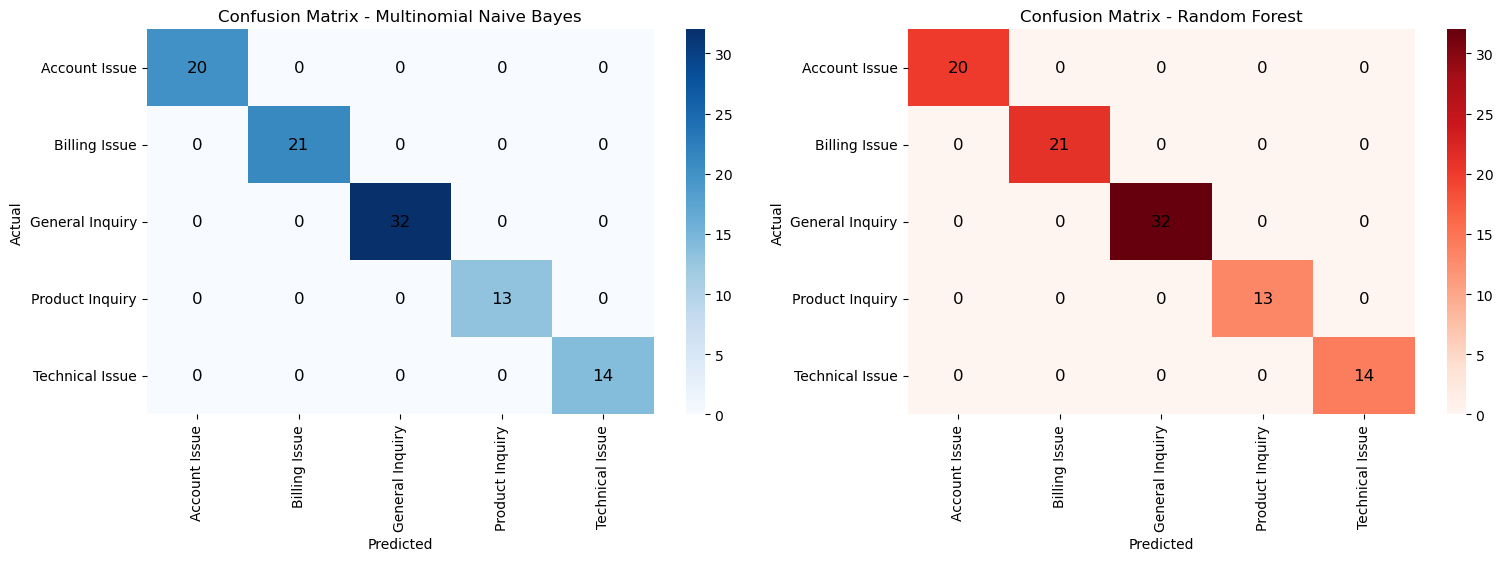

In [26]:
# Confusion Matrix Heatmap for MNB
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
ax=sns.heatmap(cm_mnb, annot=False, fmt='d', cmap='Blues', xticklabels=lbl.classes_, yticklabels=lbl.classes_)
for i in range(cm_mnb.shape[0]):
    for j in range(cm_mnb.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm_mnb[i, j]), ha='center', va='center', size=12, color='Black')
        
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix Heatmap for Random Forest
plt.subplot(1,2,2)
ax=sns.heatmap(cm_rf, annot=False, fmt='d', cmap='Reds', xticklabels=lbl.classes_, yticklabels=lbl.classes_)
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm_rf[i, j]), ha='center', va='center', size=12, color='Black')
        
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()